In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
from scipy import stats

In [40]:
data_tar0 = pd.read_csv('/gymreklab-tscc/cynthiawu/gene_correlation_modules_snorlax/test_realdatacorr/numTarget_0/Beta_0/Simulation_0/CPMA/gene-snp-eqtl', sep='\t')
data_tar1000 = pd.read_csv('/gymreklab-tscc/cynthiawu/gene_correlation_modules_snorlax/test_realdatacorr/numTarget_1000/Beta_1/Simulation_0/CPMA/gene-snp-eqtl', sep='\t')

data_tar1000_iden = pd.read_csv('/gymreklab-tscc/cynthiawu/Test_nullsnps/simulate_eqtls_only/FastMultivariate/Single_eqtl/SampleSize100/SingleParameter/numTarget_1000/Beta_1/Simulation_0/CPMA/gene-snp-eqtl', sep='\t')

realdata = pd.read_csv('/storage/cynthiawu/trans_eQTL/GTex.v8/gene_snp_eqtl_chr1_modified_mac', sep='\t')


In [24]:
pvalues_tar0 = -np.log(list(data_tar0['p-value']))


(array([7.769e+03, 4.087e+03, 1.863e+03, 7.750e+02, 2.970e+02, 1.290e+02,
        5.100e+01, 1.800e+01, 7.000e+00, 4.000e+00]),
 array([5.55140903e-05, 6.29999252e-01, 1.25994299e+00, 1.88988673e+00,
        2.51983046e+00, 3.14977420e+00, 3.77971794e+00, 4.40966168e+00,
        5.03960542e+00, 5.66954915e+00, 6.29949289e+00]),
 <a list of 10 Patch objects>)

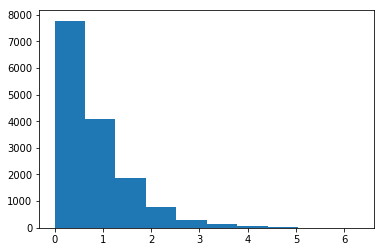

In [25]:
plt.hist(pvalues_tar0)

(array([1.3926e+04, 7.4000e+01, 1.0000e+00, 2.9000e+01, 1.8000e+02,
        3.0000e+02, 3.0100e+02, 1.4700e+02, 3.6000e+01, 6.0000e+00]),
 array([5.55140903e-05, 3.79915072e+00, 7.59824594e+00, 1.13973411e+01,
        1.51964364e+01, 1.89955316e+01, 2.27946268e+01, 2.65937220e+01,
        3.03928172e+01, 3.41919124e+01, 3.79910076e+01]),
 <a list of 10 Patch objects>)

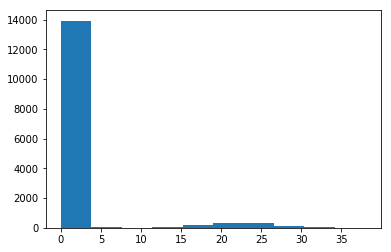

In [26]:
pvalues_tar1000 = -np.log(list(data_tar1000['p-value']))
plt.hist(pvalues_tar1000)

In [9]:
def plot_exp(param):
    x = np.linspace(0, 10, 5000)
    y = scipy.stats.expon.pdf(x, scale=1/param)
    plt.plot(x, y)

In [34]:
tar = 1000
targene = ['Gene' + str(i) for i in range(tar)]
targene_pvals = data_tar0.loc[data_tar0['gene'].isin(targene)]

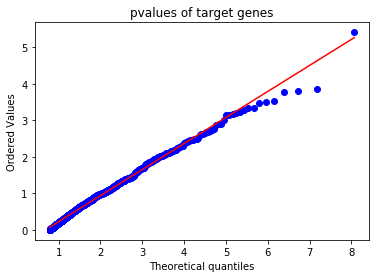

In [35]:
pvalues = -np.log(list(targene_pvals['p-value']))
max_lklh = 1 / np.mean(pvalues)

fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(pvalues, dist='expon', sparams=(1/max_lklh), plot=ax)
plt.title('pvalues of target genes')

pass

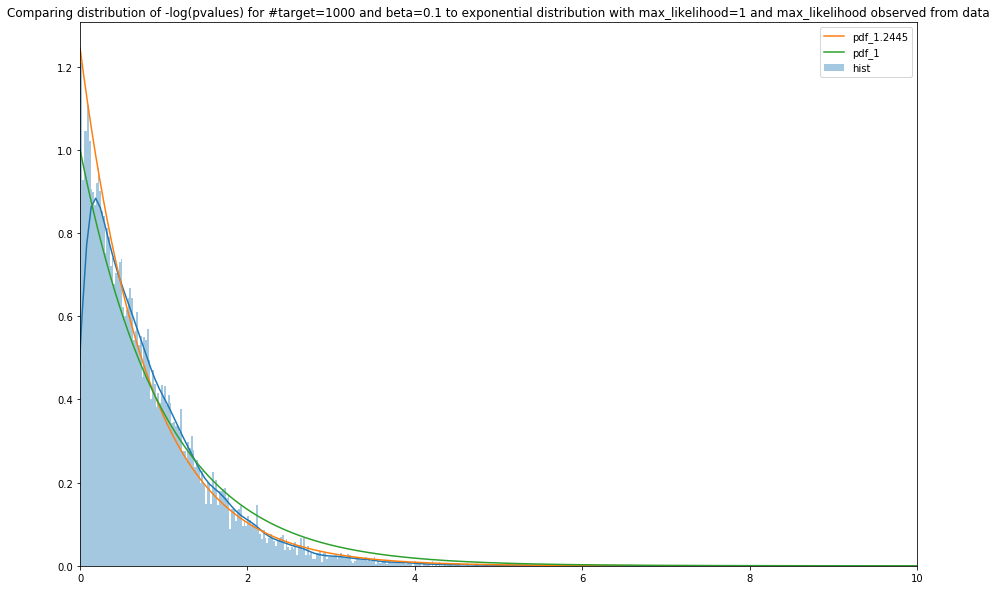

In [36]:
plt.figure(figsize=[15, 10])
pvalues = -np.log(list(data_tar0['p-value']))
max_lklh = 1 / np.mean(pvalues)
sns.distplot(pvalues, bins=300, kde=True)
plot_exp(param=max_lklh)
plot_exp(param=1)
plt.xlim((0, 10))
plt.legend([f'pdf_{max_lklh:0.5}', f'pdf_1', 'hist'])
plt.title('Comparing distribution of -log(pvalues) for #target=1000 and beta=0.1 to exponential distribution with max_likelihood=1 and max_likelihood observed from data')

pass

In [27]:
tar = 1000
targene = ['Gene' + str(i) for i in range(tar)]
targene_pvals = data_tar1000.loc[data_tar1000['gene'].isin(targene)]

In [28]:
targene_pvals

,SNP,gene,beta,t-stat,p-value,FDR
0,SNP0,Gene468,1.171979,10.268383,3.167488e-17,4.626100e-13
1,SNP0,Gene969,1.257613,10.134912,6.168133e-17,4.626100e-13
2,SNP0,Gene604,1.408252,10.042466,9.788621e-17,4.894311e-13
3,SNP0,Gene620,1.288270,9.771485,3.792519e-16,1.422195e-12
4,SNP0,Gene625,1.315556,9.692001,5.642849e-16,1.692855e-12
...,...,...,...,...,...,...
995,SNP0,Gene391,0.697607,4.920354,3.487686e-06,5.252540e-05
996,SNP0,Gene232,0.763863,4.882667,4.068342e-06,6.120876e-05
997,SNP0,Gene528,0.670177,4.766346,6.517504e-06,9.795848e-05
998,SNP0,Gene141,0.700622,4.650410,1.035965e-05,1.555503e-04


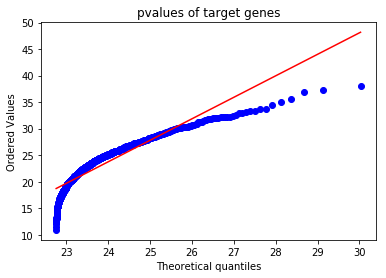

In [29]:
pvalues = -np.log(list(targene_pvals['p-value']))
max_lklh = 1 / np.mean(pvalues)

fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(pvalues, dist='expon', sparams=(1/max_lklh), plot=ax)
plt.title('pvalues of target genes')

pass

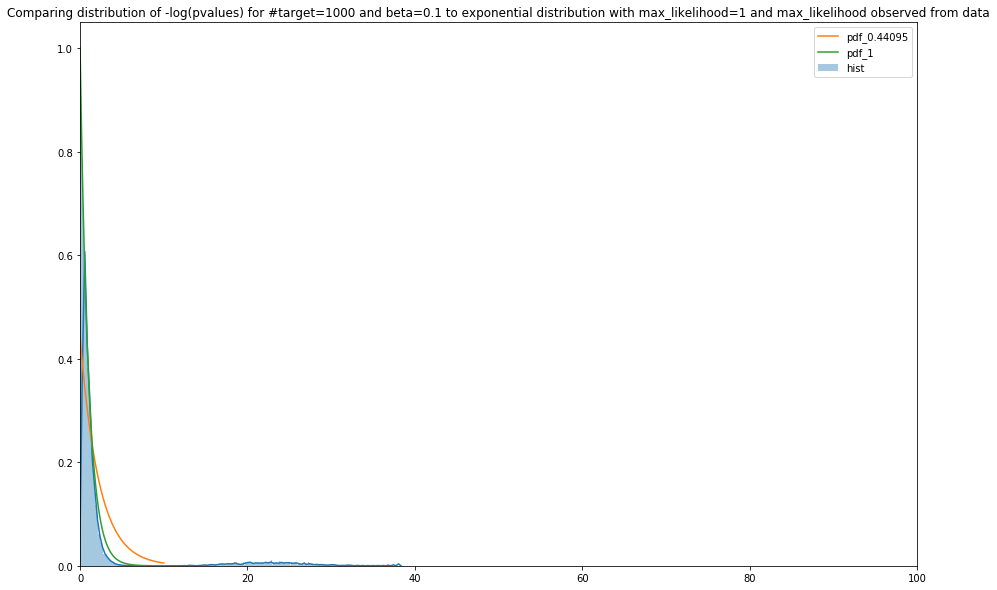

In [39]:
plt.figure(figsize=[15, 10])
pvalues = -np.log(list(data_tar1000['p-value']))
max_lklh = 1 / np.mean(pvalues)
sns.distplot(pvalues, bins=300, kde=True)
plot_exp(param=max_lklh)
plot_exp(param=1)
plt.xlim((0, 100))
plt.legend([f'pdf_{max_lklh:0.5}', f'pdf_1', 'hist'])
plt.title('Comparing distribution of -log(pvalues) for #target=1000 and beta=0.1 to exponential distribution with max_likelihood=1 and max_likelihood observed from data')

pass

In [31]:
tar = 1000
targene = ['Gene' + str(i) for i in range(tar)]
targene_pvals = data_tar1000_iden.loc[data_tar1000_iden['gene'].isin(targene)]

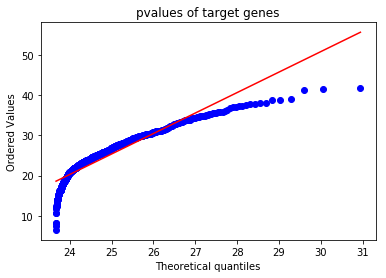

In [32]:
pvalues = -np.log(list(targene_pvals['p-value']))
max_lklh = 1 / np.mean(pvalues)

fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(pvalues, dist='expon', sparams=(1/max_lklh), plot=ax)
plt.title('pvalues of target genes')

pass

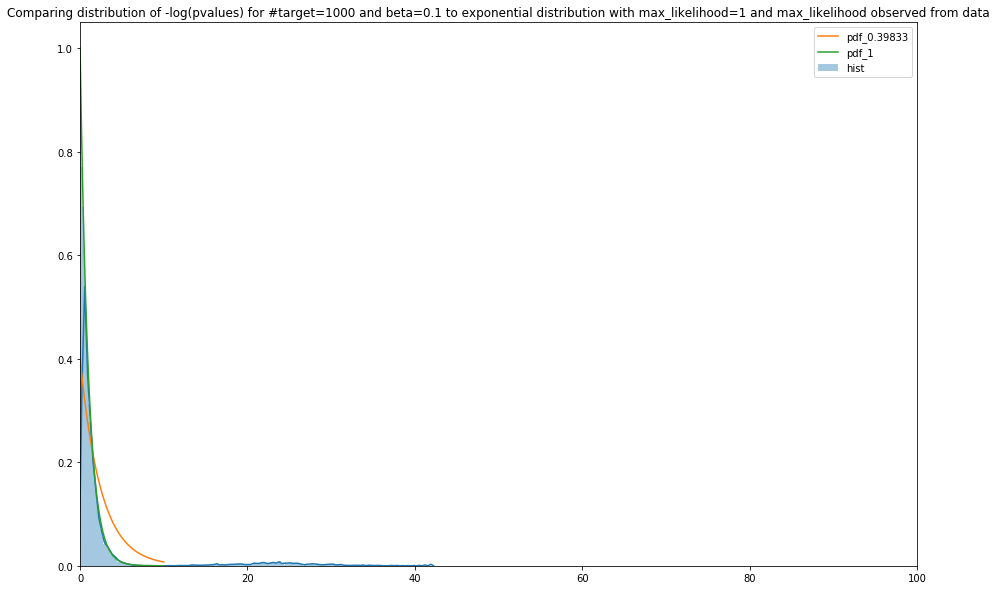

In [37]:
plt.figure(figsize=[15, 10])
pvalues = -np.log(list(data_tar1000_iden['p-value']))
max_lklh = 1 / np.mean(pvalues)
sns.distplot(pvalues, bins=300, kde=True)
plot_exp(param=max_lklh)
plot_exp(param=1)
plt.xlim((0, 100))
plt.legend([f'pdf_{max_lklh:0.5}', f'pdf_1', 'hist'])
plt.title('Comparing distribution of -log(pvalues) for #target=1000 and beta=0.1 to exponential distribution with max_likelihood=1 and max_likelihood observed from data')

pass



In [43]:
realdata

,SNP,gene,beta,t-stat,p-value,FDR
0,chr1_150706557,ENSG00000143452.15,3.064558,37.854203,2.765078e-139,3.356394e-131
1,chr1_63415881,ENSG00000142856.16,-2.798130,-37.041112,3.615622e-136,2.194414e-128
2,chr1_150755063,ENSG00000143452.15,2.940548,29.228490,2.082241e-104,8.425103e-97
3,chr1_150836413,ENSG00000143452.15,2.859252,27.401911,1.558007e-96,4.727972e-89
4,chr1_109689124,ENSG00000134184.12,56.050508,24.544336,6.168567e-84,1.497545e-76
...,...,...,...,...,...,...
121385137,chr1_248388084,ENSG00000212907.2,0.000000,0.000000,1.000000e+00,1.000000e+00
121385138,chr1_248388084,ENSG00000198886.2,0.000000,0.000000,1.000000e+00,1.000000e+00
121385139,chr1_248388084,ENSG00000198786.2,0.000000,0.000000,1.000000e+00,1.000000e+00
121385140,chr1_248388084,ENSG00000198695.2,0.000000,0.000000,1.000000e+00,1.000000e+00


In [50]:
# targene_pvals = data_tar1000.loc[data_tar1000['SNP'].isin('chr1_10461592')]
realdata.iloc[100000]

SNP             chr1_10461592
gene       ENSG00000089057.14
beta                  10.6561
t-stat                3.64016
p-value           0.000305468
FDR                  0.370779
Name: 100000, dtype: object

### Real null snp #1

In [56]:
null_snp_real = realdata.loc[realdata['SNP'] == 'chr1_10461592']


In [57]:
null_snp_real

,SNP,gene,beta,t-stat,p-value,FDR
1512,chr1_10461592,ENSG00000239839.6,19.968496,8.074964,6.784156e-15,5.442800e-10
4240,chr1_10461592,ENSG00000170956.16,0.301213,6.288685,7.848948e-10,2.246512e-05
5325,chr1_10461592,ENSG00000162747.9,3.158283,6.016950,3.794355e-09,8.646899e-05
6683,chr1_10461592,ENSG00000163464.7,1.779104,5.747492,1.713346e-08,3.111343e-04
8120,chr1_10461592,ENSG00000131355.14,0.172720,5.534047,5.435784e-08,8.124903e-04
...,...,...,...,...,...,...
116777812,chr1_10461592,ENSG00000120337.8,0.000021,0.000287,9.997712e-01,1.000000e+00
116782259,chr1_10461592,ENSG00000173714.7,-0.000114,-0.000240,9.998088e-01,1.000000e+00
116790914,chr1_10461592,ENSG00000159692.15,-0.000228,-0.000149,9.998809e-01,1.000000e+00
116793573,chr1_10461592,ENSG00000133114.17,-0.000037,-0.000121,9.999033e-01,1.000000e+00


(array([1.636e+04, 4.060e+02, 4.600e+01, 1.700e+01, 3.000e+00, 4.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([2.98050253e-05, 3.26244548e+00, 6.52486116e+00, 9.78727683e+00,
        1.30496925e+01, 1.63121082e+01, 1.95745239e+01, 2.28369395e+01,
        2.60993552e+01, 2.93617709e+01, 3.26241866e+01]),
 <a list of 10 Patch objects>)

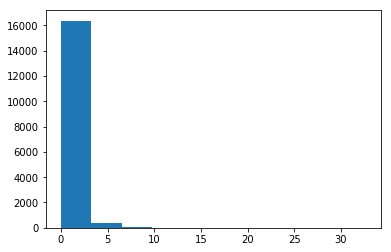

In [58]:
pvalues_null_snp_real = -np.log(list(null_snp_real['p-value']))
plt.hist(pvalues_null_snp_real)

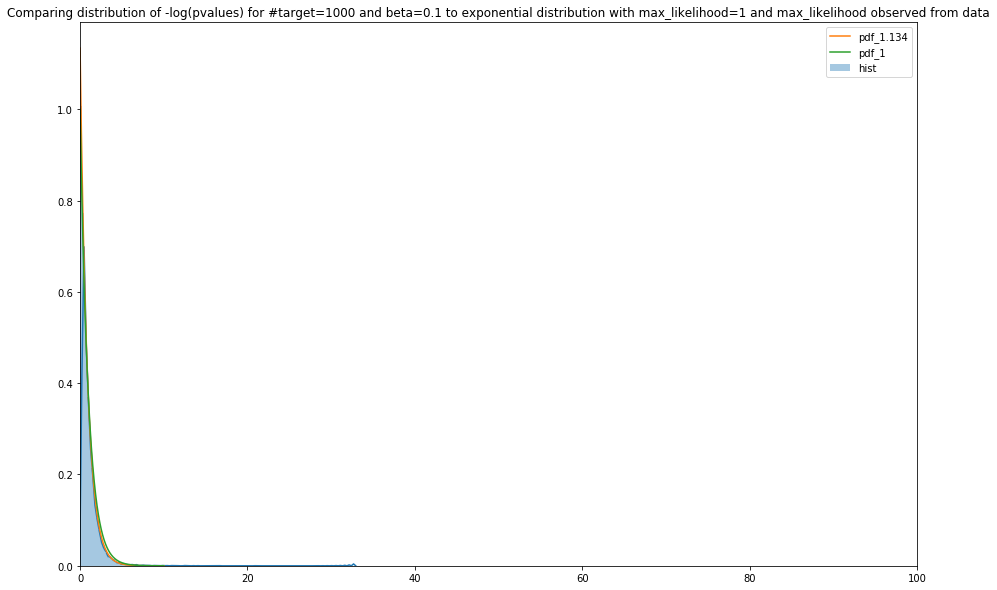

In [59]:
plt.figure(figsize=[15, 10])
pvalues = -np.log(list(null_snp_real['p-value']))
max_lklh = 1 / np.mean(pvalues)
sns.distplot(pvalues, bins=300, kde=True)
plot_exp(param=max_lklh)
plot_exp(param=1)
plt.xlim((0, 100))
plt.legend([f'pdf_{max_lklh:0.5}', f'pdf_1', 'hist'])
plt.title('Comparing distribution of -log(pvalues) for #target=1000 and beta=0.1 to exponential distribution with max_likelihood=1 and max_likelihood observed from data')

pass



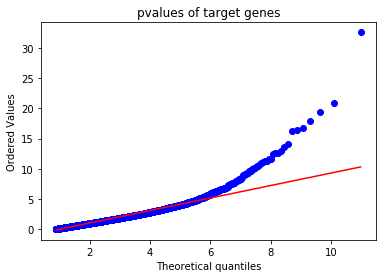

In [60]:
pvalues = -np.log(list(null_snp_real['p-value']))
max_lklh = 1 / np.mean(pvalues)

fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(pvalues, dist='expon', sparams=(1/max_lklh), plot=ax)
plt.title('pvalues of target genes')

pass

### Null snp #2

In [69]:
null_snp_real = realdata.loc[realdata['SNP'] == 'chr1_92513797']


(array([1.6371e+04, 4.4300e+02, 2.1000e+01, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([6.97994726e-06, 3.23155741e+00, 6.46310784e+00, 9.69465827e+00,
        1.29262087e+01, 1.61577591e+01, 1.93893096e+01, 2.26208600e+01,
        2.58524104e+01, 2.90839608e+01, 3.23155113e+01]),
 <a list of 10 Patch objects>)

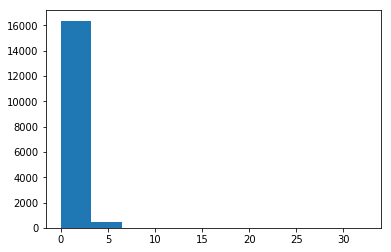

In [70]:
pvalues_null_snp_real = -np.log(list(null_snp_real['p-value']))
plt.hist(pvalues_null_snp_real)

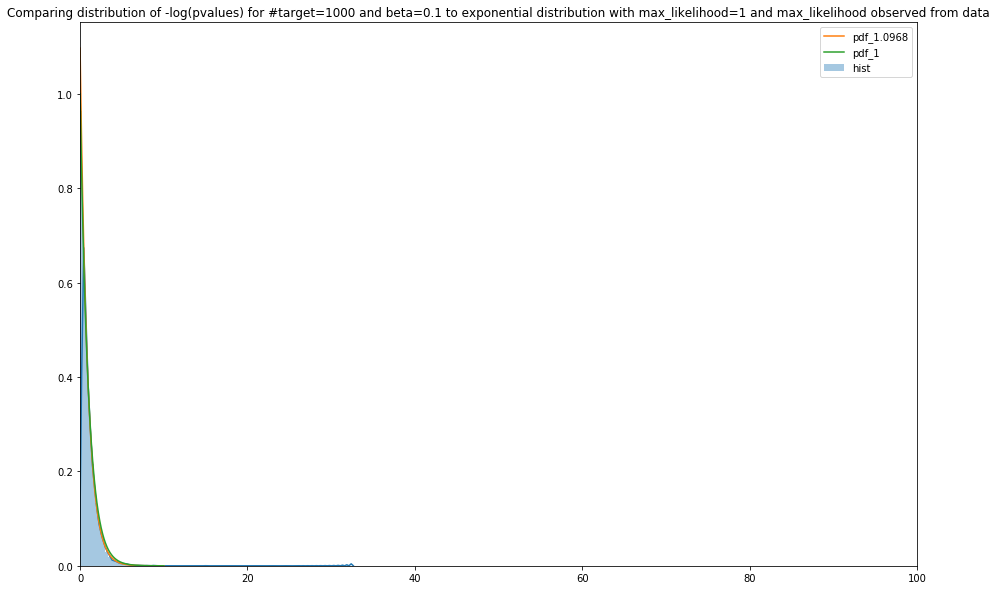

In [71]:
plt.figure(figsize=[15, 10])
pvalues = -np.log(list(null_snp_real['p-value']))
max_lklh = 1 / np.mean(pvalues)
sns.distplot(pvalues, bins=300, kde=True)
plot_exp(param=max_lklh)
plot_exp(param=1)
plt.xlim((0, 100))
plt.legend([f'pdf_{max_lklh:0.5}', f'pdf_1', 'hist'])
plt.title('Comparing distribution of -log(pvalues) for #target=1000 and beta=0.1 to exponential distribution with max_likelihood=1 and max_likelihood observed from data')

pass



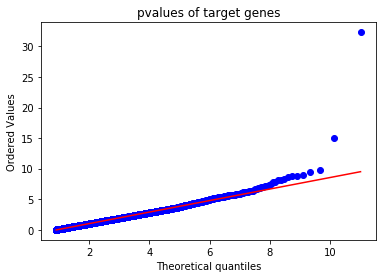

In [72]:
pvalues = -np.log(list(null_snp_real['p-value']))
max_lklh = 1 / np.mean(pvalues)

fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(pvalues, dist='expon', sparams=(1/max_lklh), plot=ax)
plt.title('pvalues of target genes')

pass

### Real eqtl #1

In [61]:
eqtl_real = realdata.loc[realdata['SNP'] == 'chr1_15462802']


(array([1.4409e+04, 2.0860e+03, 2.8500e+02, 5.2000e+01, 3.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([6.04710187e-05, 1.80617574e+00, 3.61229101e+00, 5.41840628e+00,
        7.22452155e+00, 9.03063682e+00, 1.08367521e+01, 1.26428674e+01,
        1.44489826e+01, 1.62550979e+01, 1.80612132e+01]),
 <a list of 10 Patch objects>)

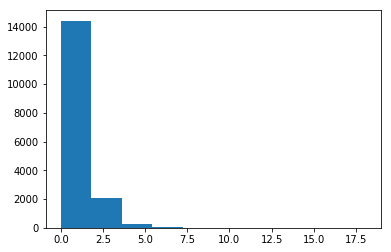

In [62]:
pvalues_eqtl_real = -np.log(list(eqtl_real['p-value']))
plt.hist(pvalues_eqtl_real)

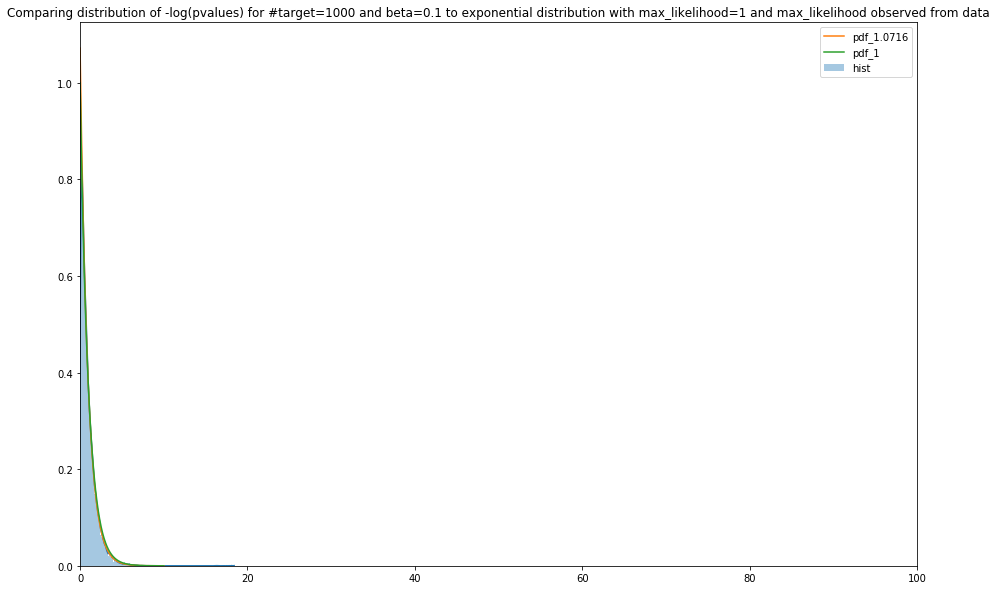

In [63]:
plt.figure(figsize=[15, 10])
pvalues = -np.log(list(eqtl_real['p-value']))
max_lklh = 1 / np.mean(pvalues)
sns.distplot(pvalues, bins=300, kde=True)
plot_exp(param=max_lklh)
plot_exp(param=1)
plt.xlim((0, 100))
plt.legend([f'pdf_{max_lklh:0.5}', f'pdf_1', 'hist'])
plt.title('Comparing distribution of -log(pvalues) for #target=1000 and beta=0.1 to exponential distribution with max_likelihood=1 and max_likelihood observed from data')

pass



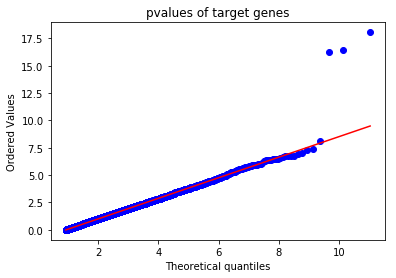

In [64]:
pvalues = -np.log(list(eqtl_real['p-value']))
max_lklh = 1 / np.mean(pvalues)

fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(pvalues, dist='expon', sparams=(1/max_lklh), plot=ax)
plt.title('pvalues of target genes')

pass

### Real trans eqtl #2

In [65]:
eqtl_real2 = realdata.loc[realdata['SNP'] == 'chr1_88805891']


(array([1.6584e+04, 2.4700e+02, 5.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([2.65715298e-05, 4.73261369e+00, 9.46520080e+00, 1.41977879e+01,
        1.89303750e+01, 2.36629621e+01, 2.83955493e+01, 3.31281364e+01,
        3.78607235e+01, 4.25933106e+01, 4.73258977e+01]),
 <a list of 10 Patch objects>)

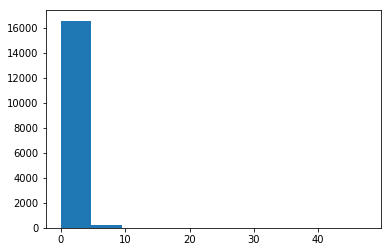

In [66]:
pvalues_eqtl_real = -np.log(list(eqtl_real2['p-value']))
plt.hist(pvalues_eqtl_real)

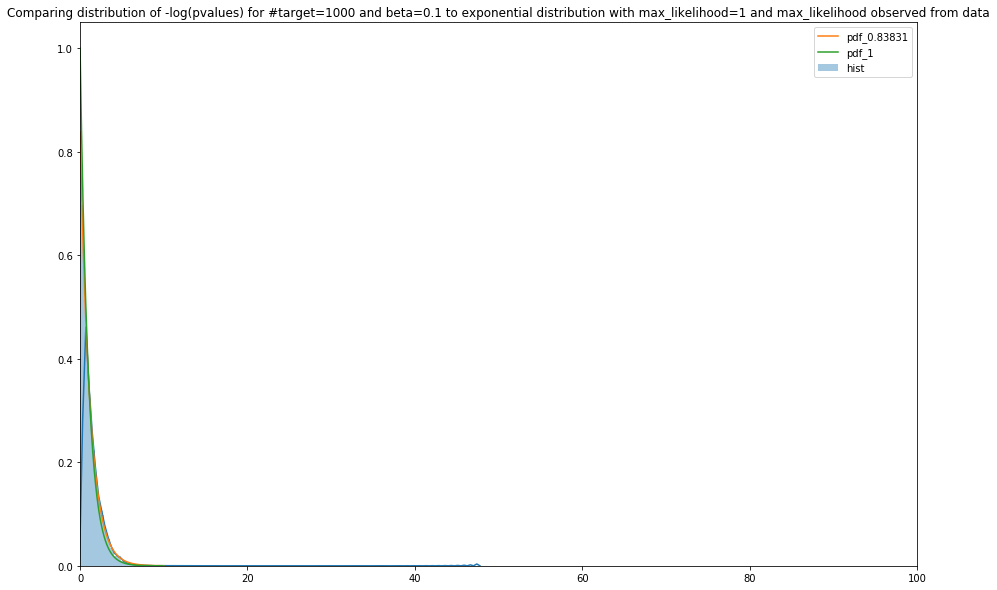

In [67]:
plt.figure(figsize=[15, 10])
pvalues = -np.log(list(eqtl_real2['p-value']))
max_lklh = 1 / np.mean(pvalues)
sns.distplot(pvalues, bins=300, kde=True)
plot_exp(param=max_lklh)
plot_exp(param=1)
plt.xlim((0, 100))
plt.legend([f'pdf_{max_lklh:0.5}', f'pdf_1', 'hist'])
plt.title('Comparing distribution of -log(pvalues) for #target=1000 and beta=0.1 to exponential distribution with max_likelihood=1 and max_likelihood observed from data')

pass



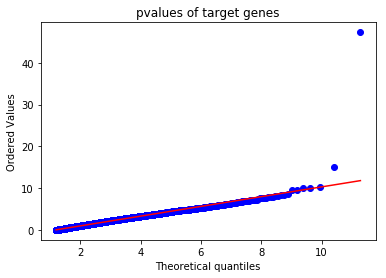

In [68]:
pvalues = -np.log(list(eqtl_real2['p-value']))
max_lklh = 1 / np.mean(pvalues)

fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(pvalues, dist='expon', sparams=(1/max_lklh), plot=ax)
plt.title('pvalues of target genes')

pass